<h1>Feature Selection</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
# load the dataset
df = pd.read_csv('../data/heart_disease_cleaned.csv')
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,1.007386,1.0,0.705176,0.303643,1.0,0.489727,0.0,1.368109,0,False,False,False,False,True,False,True,True,False
1,1.432034,1.0,1.518569,0.789967,0.0,-1.181478,1.0,0.611589,1,False,False,True,False,True,True,False,False,False
2,1.432034,1.0,-0.650479,0.266939,0.0,-0.345875,1.0,1.651804,1,False,False,True,False,True,True,False,False,True
3,-1.752828,1.0,-0.108217,0.459634,0.0,1.961979,0.0,2.502889,0,False,True,False,False,False,False,True,False,False
4,-1.328180,0.0,-0.108217,0.037541,0.0,1.365120,0.0,0.517024,0,True,False,False,False,True,False,False,False,False


In [4]:
# seperate features and target variable
X = df.drop('target', axis=1)
y = df['target']

In [5]:
# Random Forest Classifier for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

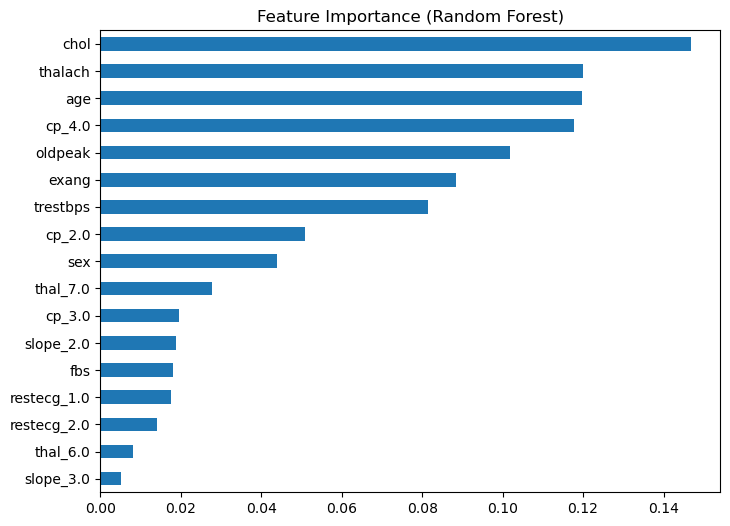

In [6]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()

<p>Recursive Feature Elimination (RFE)</p>

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [8]:
# Logistic Regression model for RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)

In [9]:
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features.tolist())

Selected features by RFE: ['sex', 'exang', 'cp_2.0', 'cp_4.0', 'thal_7.0']


<p>Chi-Square Test</p>

In [10]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest

In [11]:
# Scale features to non-negative for chi2
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
chi_scores, p_values = chi2(X_scaled, y)

In [13]:
chi2_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values("Chi2 Score", ascending=False)

chi2_results

,Feature,Chi2 Score,p-value
8,cp_2.0,121.437148,3.065612e-28
10,cp_4.0,112.777005,2.414600e-26
6,exang,109.611826,1.191873e-25
16,thal_7.0,48.094615,4.061404e-12
9,cp_3.0,31.519125,1.974855e-08
1,sex,18.318202,1.869128e-05
14,slope_3.0,12.848567,3.377377e-04
4,fbs,9.133272,2.510024e-03
11,restecg_1.0,8.130710,4.352171e-03
15,thal_6.0,8.021673,4.622085e-03


<p>Save Reduced Dataset</p>

In [14]:
top_features = feat_importances.sort_values(ascending=False).head(7).index.tolist()
top_features

['chol', 'thalach', 'age', 'cp_4.0', 'oldpeak', 'exang', 'trestbps']

In [15]:
X_reduced = df[top_features]
df_reduced = pd.concat([X_reduced, y], axis=1)

In [16]:
# encoding (0, 1) for cp_4.0
df_reduced["cp_4.0"] = df_reduced["cp_4.0"].apply(lambda x: 1 if x > 0 else 0)

In [17]:
# save the reduced dataset
df_reduced.to_csv('../data/heart_disease_selected.csv', index=False)
print("Reduced dataset saved to '../data/heart_disease_selected.csv'")

Reduced dataset saved to '../data/heart_disease_selected.csv'
